<a href="https://colab.research.google.com/github/HazemHassine/Machine-Learning-Components/blob/master/Linear_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## In this notebook, the algorithms implemented are:
1. hinge Loss
2. Cost Gradient
3. Stochastic Gradient Descent

In [ ]:
import numpy as np
import pandas as pd
from sklearn.utils import shuffle

def compute_cost(weights, X, Y):
  N = X.shape[0]
  distances = 1 - Y* np.dot(W , X)
  distances[distances < 0] = 0 # equal to max(0, distance)
  hinge_loss = reguralization_strength * np.sum(distances) / N

  cost = 1/2 * np.dot(W,W) + hinge_loss # np.dot(W,W) gets the normal length of W vector

  return cost

In [ ]:
def calculate_cost_gradient(W, X_batch, Y_batch):
    # if only one example is passed (eg. in case of SGD)
    if type(Y_batch) == np.float64:
        Y_batch = np.array([Y_batch])
        X_batch = np.array([X_batch])  # gives multidimensional array for compatability

    distance = 1 - (Y_batch * np.dot(X_batch, W))
    dw = np.zeros(len(W))

    for ind, d in enumerate(distance):
        if max(0, d) == 0:
            di = W
        else:
            di = W - (regularization_strength * Y_batch[ind] * X_batch[ind])
            # the regularization strength usually denoted as lambda, or 1/Ci 
            # this variable dsecribes variance of the margin's width
        dw += di

    dw = dw/len(Y_batch)  # average
    return dw

In [ ]:
def sgd(features, outputs):
    max_epochs = 5000
    weights = np.zeros(features.shape[1])
    nth = 0
    prev_cost = float("inf")
    cost_threshold = 0.01  # in percent
    # stochastic gradient descent
    for epoch in range(1, max_epochs):
        # shuffle to prevent repeating update cycles
        X, Y = shuffle(features, outputs)
        for ind, x in enumerate(X):
            ascent = calculate_cost_gradient(weights, x, Y[ind])
            weights = weights - (learning_rate * ascent)

        # convergence check on 2^nth epoch
        if epoch == 2 ** nth or epoch == max_epochs - 1:
            cost = compute_cost(weights, features, outputs)
            print("Epoch is: {} and Cost is: {}".format(epoch, cost))
            # stoppage criterion
            if abs(prev_cost - cost) < cost_threshold * prev_cost:
                return weights
            prev_cost = cost
            nth += 1
    return weights

In [35]:
import numpy as np

class SVM:
  def __init__(self, learning_rate=0.001, iters=1000,regularizing_term=0.01):
    self.w = None
    self.b = None
    self.learning_rate = learning_rate
    self.iters = iters
    self.regularizing_term = regularizing_term
  def train(self, X, Y):
    y = np.where(Y <= 0, -1, 1)
    n_samples, n_features = X.shape

    self.w = np.zeros(n_features)
    self.b = .0

    for _ in range(self.iters):
      for i, x_i in enumerate(X):
        if ((y[i] * (np.dot(x_i, self.w) - self.b)) >= 1):
          self.w -= self.learning_rate * (self.regularizing_term * 2 * self.w)
        else:
          self.w -= self.learning_rate * (2 * self.regularizing_term * self.w - np.dot(x_i, y[i]))
          self.b -= self.learning_rate * y[i]
  
  def predict(self, X):
    return np.sign(np.dot(X, self.w) - self.b)

In [49]:
from sklearn import datasets
import matplotlib.pyplot as plt

X, y = datasets.make_blobs(n_samples=50, n_features=2, centers=2, cluster_std=1.05, random_state=42)
clf = SVM()
clf.train(X,y)


# visualizing code from: https://github.com/patrickloeber/
def visualize_svm(X,Y, clf):
  def get_hyperplane_value(x, w, b, offset):
      return (-w[0] * x + b + offset) / w[1]
  fig = plt.figure()
  ax = fig.add_subplot(1, 1, 1)
  plt.scatter(X[:, 0], X[:, 1], marker="o", c=y)
  x0_1 = np.amin(X[:, 0])
  x0_2 = np.amax(X[:, 0])
  x1_1 = get_hyperplane_value(x0_1, clf.w, clf.b, 0)
  x1_2 = get_hyperplane_value(x0_2, clf.w, clf.b, 0)
  x1_1_m = get_hyperplane_value(x0_1, clf.w, clf.b, -1)
  x1_2_m = get_hyperplane_value(x0_2, clf.w, clf.b, -1)
  x1_1_p = get_hyperplane_value(x0_1, clf.w, clf.b, 1)
  x1_2_p = get_hyperplane_value(x0_2, clf.w, clf.b, 1)
  ax.plot([x0_1, x0_2], [x1_1, x1_2], "y--")
  ax.plot([x0_1, x0_2], [x1_1_m, x1_2_m], "k")
  ax.plot([x0_1, x0_2], [x1_1_p, x1_2_p], "k")
  x1_min = np.amin(X[:, 1])
  x1_max = np.amax(X[:, 1])
  ax.set_ylim([x1_min - 3, x1_max + 3])
  plt.show()

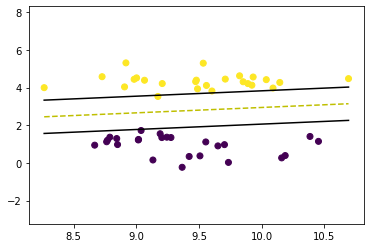

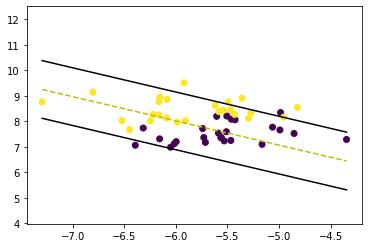

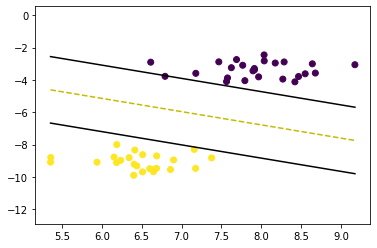

In [55]:
for _ in range(3):
  X, y = datasets.make_blobs(n_samples=50, n_features=2, centers=2, cluster_std=0.5, random_state=_+4)
  clf = SVM()
  clf.train(X,y)
  visualize_svm(X,y,clf)
